In [3]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=6792.18, amp=0.5, offset=0)
sin_sig = SinSignal(freq=6792.18, amp=0.5, offset=0)

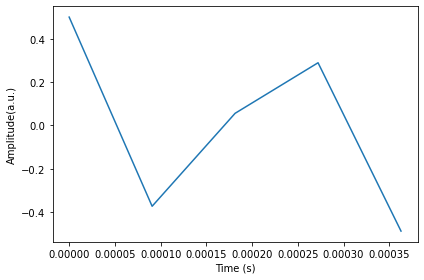

In [4]:
from thinkdsp import decorate

cos_sig.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

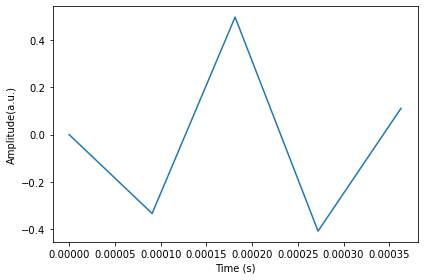

In [5]:
sin_sig.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

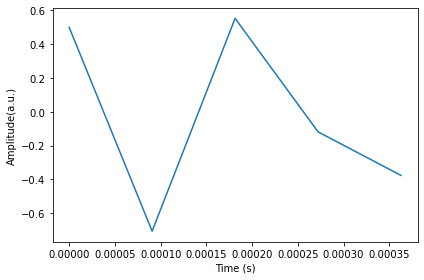

In [6]:
mix = sin_sig + cos_sig
mix

mix.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

In [7]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave

In [8]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

In [9]:
from thinkdsp import read_wave

wave = read_wave('005_bunyi_drum.wav')
wave.make_audio()

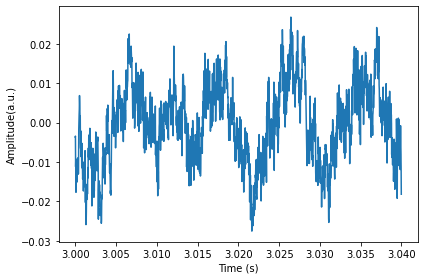

In [12]:
start = 3.0
duration = 0.04
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

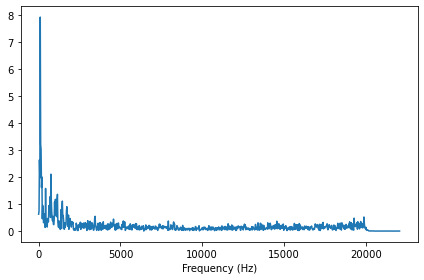

In [13]:
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

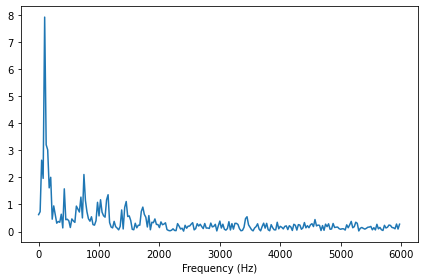

In [14]:
spectrum.plot(high=6000)
decorate(xlabel='Frequency (Hz)')

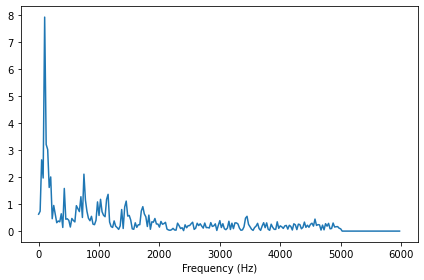

In [15]:
spectrum.low_pass(5000)
spectrum.plot(high=6000)
decorate(xlabel='Frequency (Hz)')

In [16]:
filtered = spectrum.make_wave()
filtered.normalize()

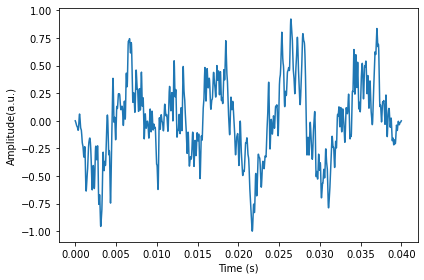

In [17]:
filtered.apodize()
filtered.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

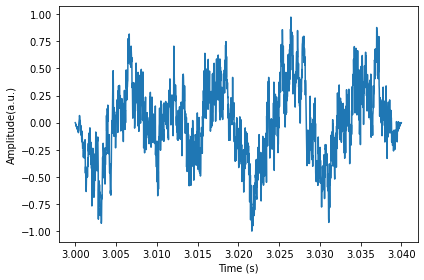

In [18]:
segment.normalize()
segment.apodize()
segment.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

In [19]:
segment.make_audio()

In [20]:
filtered.make_audio()

In [21]:
import matplotlib.pyplot as plt
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    plt.show()
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [24]:
from ipywidgets import interact, fixed

wave = read_wave('005_bunyi_drum.wav')
interact(filter_wave, wave=fixed(wave), 
         start=(0, 3.0, 0.1), duration=(0, 0.5, 0.1), cutoff=(0, 6000, 100));

interactive(children=(FloatSlider(value=1.5, description='start', max=3.0), FloatSlider(value=0.2, description…